In [1]:
from fedn import APIClient
import time
import uuid
import json
import matplotlib.pyplot as plt
import numpy as np
import collections

In [2]:
DISCOVER_HOST = '127.0.0.1'
DISCOVER_PORT = 8092
client = APIClient(DISCOVER_HOST, DISCOVER_PORT)

In [3]:
client.list_sessions()

{'count': 1,
 'result': [{'aggregator': 'fedavg',
   'buffer_size': -1,
   'clients_requested': 8,
   'clients_required': 1,
   'committed_at': 'Tue, 05 Mar 2024 13:33:44 GMT',
   'delete_models_storage': True,
   'helper_type': 'numpyhelper',
   'model_id': 'f4de4483-c351-4c4a-b763-e3def6b6160d',
   'round_timeout': 180,
   'rounds': 10,
   'session_id': 'experiment_fedavg_lf_attack',
   'task': '',
   'validate': True}]}

In [4]:
session_id = input("Provide a session_id: ")

Provide a session_id: experiment_fedavg_lf_attack


In [5]:
models = client.list_models(session_id)
models

{'count': 10,
 'result': [{'committed_at': 'Tue, 05 Mar 2024 13:39:00 GMT',
   'model': '5702a9fa-705d-4c08-92a7-775fa626f89f',
   'session_id': 'experiment_fedavg_lf_attack'},
  {'committed_at': 'Tue, 05 Mar 2024 13:38:29 GMT',
   'model': '518e8492-622e-41b7-822d-3ab2101d21b1',
   'session_id': 'experiment_fedavg_lf_attack'},
  {'committed_at': 'Tue, 05 Mar 2024 13:38:00 GMT',
   'model': '3c7ad0f1-a881-4284-b46b-99698d75a773',
   'session_id': 'experiment_fedavg_lf_attack'},
  {'committed_at': 'Tue, 05 Mar 2024 13:37:27 GMT',
   'model': '8549f74f-e114-40d0-9a01-31da24c5abdb',
   'session_id': 'experiment_fedavg_lf_attack'},
  {'committed_at': 'Tue, 05 Mar 2024 13:36:53 GMT',
   'model': '36274757-1772-4574-8089-c82ee20135cb',
   'session_id': 'experiment_fedavg_lf_attack'},
  {'committed_at': 'Tue, 05 Mar 2024 13:36:19 GMT',
   'model': 'e29c0465-19d1-4140-bd80-a9f02d995d4d',
   'session_id': 'experiment_fedavg_lf_attack'},
  {'committed_at': 'Tue, 05 Mar 2024 13:35:48 GMT',
   'mo

In [6]:
num_rounds = models['count']
num_rounds

10

In [7]:
# Provides a model trail for a given session (in FILO) --> need to be reversed
model_trail = models['result']
model_trail.reverse()
model_trail

[{'committed_at': 'Tue, 05 Mar 2024 13:34:12 GMT',
  'model': '1836db54-1b37-4781-b757-745caaf3068c',
  'session_id': 'experiment_fedavg_lf_attack'},
 {'committed_at': 'Tue, 05 Mar 2024 13:34:45 GMT',
  'model': 'cb80f0dc-2cb7-4f00-af92-71a702673629',
  'session_id': 'experiment_fedavg_lf_attack'},
 {'committed_at': 'Tue, 05 Mar 2024 13:35:16 GMT',
  'model': '96703468-6f40-45e5-84b6-b102e378e1dc',
  'session_id': 'experiment_fedavg_lf_attack'},
 {'committed_at': 'Tue, 05 Mar 2024 13:35:48 GMT',
  'model': 'e2edf411-05f8-4ab7-b6f3-a3afb90bcce5',
  'session_id': 'experiment_fedavg_lf_attack'},
 {'committed_at': 'Tue, 05 Mar 2024 13:36:19 GMT',
  'model': 'e29c0465-19d1-4140-bd80-a9f02d995d4d',
  'session_id': 'experiment_fedavg_lf_attack'},
 {'committed_at': 'Tue, 05 Mar 2024 13:36:53 GMT',
  'model': '36274757-1772-4574-8089-c82ee20135cb',
  'session_id': 'experiment_fedavg_lf_attack'},
 {'committed_at': 'Tue, 05 Mar 2024 13:37:27 GMT',
  'model': '8549f74f-e114-40d0-9a01-31da24c5abdb'

In [9]:
validations = []

for model_instance in model_trail:
    worker_results = client.list_validations(modelId=model_instance['model'])
    result_ids = [result_id for result_id in worker_results]
    for result_id in result_ids:
        worker_result = worker_results.get(result_id)
        client_type = 'benign'
        
        if 'malicious' in worker_result['sender']['name']:
            client_type = 'malicious'
            
        validation = {
            'model_committed_at': model_instance['committed_at'],
            'session_id': model_instance['session_id'],
            'model': model_instance['model'],
            'client_name': worker_result['sender']['name'],
            'client_role': worker_result['sender']['role'],
            'client_type': client_type,
            'training_loss': json.loads(worker_result['data'])['training_loss'],
            'training_accuracy': json.loads(worker_result['data'])['training_accuracy'],
            'test_loss': json.loads(worker_result['data'])['test_loss'],
            'test_accuracy': json.loads(worker_result['data'])['test_accuracy']
        }
        
        validations.append(validation)
        

In [10]:
validations

[{'model_committed_at': 'Tue, 05 Mar 2024 13:34:12 GMT',
  'session_id': 'experiment_fedavg_lf_attack',
  'model': '1836db54-1b37-4781-b757-745caaf3068c',
  'client_name': 'benign_client2',
  'client_role': 'WORKER',
  'client_type': 'benign',
  'training_loss': 1.5673645734786987,
  'training_accuracy': 0.7738000154495239,
  'test_loss': 1.6268917322158813,
  'test_accuracy': 0.7262905240058899},
 {'model_committed_at': 'Tue, 05 Mar 2024 13:34:12 GMT',
  'session_id': 'experiment_fedavg_lf_attack',
  'model': '1836db54-1b37-4781-b757-745caaf3068c',
  'client_name': 'benign_client1',
  'client_role': 'WORKER',
  'client_type': 'benign',
  'training_loss': 1.548387050628662,
  'training_accuracy': 0.7853999733924866,
  'test_loss': 1.6311389207839966,
  'test_accuracy': 0.7280912399291992},
 {'model_committed_at': 'Tue, 05 Mar 2024 13:34:12 GMT',
  'session_id': 'experiment_fedavg_lf_attack',
  'model': '1836db54-1b37-4781-b757-745caaf3068c',
  'client_name': 'benign_client4',
  'client

In [11]:
set([validation['client_name'] for validation in validations])

{'benign_client1',
 'benign_client2',
 'benign_client3',
 'benign_client4',
 'malicious_client1',
 'malicious_client2'}

In [12]:
graph_data = {
    'training_loss': {
        client: [] for client in set([validation['client_name'] for validation in validations])
    },
    'training_accuracy': {
        client: [] for client in set([validation['client_name'] for validation in validations])
    },
    'test_loss': {
        client: [] for client in set([validation['client_name'] for validation in validations])
    },
    'test_accuracy': {
        client: [] for client in set([validation['client_name'] for validation in validations])
    }
}

In [13]:
for validation in validations:
    graph_data['training_loss'][validation['client_name']].append(validation['training_loss'])
    graph_data['training_accuracy'][validation['client_name']].append(validation['training_accuracy'])
    graph_data['test_loss'][validation['client_name']].append(validation['test_loss'])
    graph_data['test_accuracy'][validation['client_name']].append(validation['test_accuracy'])

In [22]:
graph_data

{'training_loss': {'benign_client3': [1.5551762580871582,
   0.5674248337745667,
   0.4068688154220581,
   0.3444003760814667,
   0.3164752721786499,
   0.2897506356239319,
   0.2761128544807434,
   0.2620786428451538,
   0.24829572439193726,
   0.2387111634016037],
  'benign_client2': [1.5673645734786987,
   0.5775647759437561,
   0.4142305552959442,
   0.35229620337486267,
   0.3186076879501343,
   0.2909184694290161,
   0.2743013799190521,
   0.25864139199256897,
   0.24609804153442383,
   0.23494331538677216],
  'benign_client1': [1.548387050628662,
   0.5582768321037292,
   0.39825162291526794,
   0.3348609507083893,
   0.30384936928749084,
   0.276668906211853,
   0.2601196765899658,
   0.245705246925354,
   0.2334006130695343,
   0.2224976271390915],
  'benign_client4': [1.5774943828582764,
   0.5902866721153259,
   0.42392241954803467,
   0.36083540320396423,
   0.3296704888343811,
   0.3005332946777344,
   0.2849964201450348,
   0.26929447054862976,
   0.2570168972015381,
   0

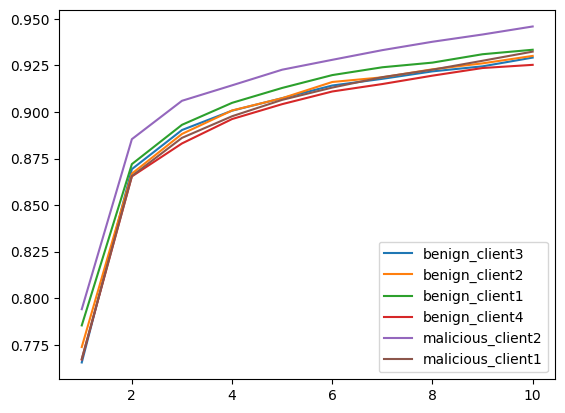

In [20]:
x = range(1, num_rounds + 1)

for i in range(len(graph_data['training_accuracy'])):
    plt.plot(x, graph_data['training_accuracy'][list(graph_data['training_accuracy'].keys())[i]])

plt.legend(graph_data['training_accuracy'].keys())
plt.show()

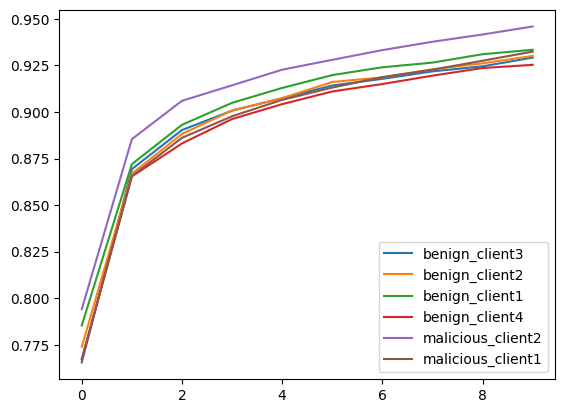

In [21]:
x = range(num_rounds)

for i in range(len(graph_data['training_accuracy'])):
    plt.plot(x, graph_data['training_accuracy'][list(graph_data['training_accuracy'].keys())[i]])

plt.legend(graph_data['training_accuracy'].keys())
plt.show()